Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


Verify the drive


In [ ]:
# import os
# os.chdir("/content/drive/MyDrive/ML_CS539")
# !ls

Reading the training and testing dataset

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
# test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')

path = "/content/training.csv"
data = pd.read_csv(path)
path1 = "/content/testing.csv"
test_data = pd.read_csv(path1)

Dropping columns

In [ ]:
data = data.drop(['state', 'Next_Year_Top_10'], axis=1)
test_data = test_data.drop(['state', 'Next_Year_Top_10'], axis=1)

In [ ]:
X = data.drop("Next_Year_Crime_Rate", axis=1)
Y = data["Next_Year_Crime_Rate"]

In [ ]:
X_test = test_data.drop("Next_Year_Crime_Rate", axis=1)
Y_test = test_data["Next_Year_Crime_Rate"]

Pre-processing the dataset

In [ ]:
X["year"] = [(1 + (i-1980)) for i in X["year"]]
X_test["year"] = [(1 + (i-1980)) for i in X_test["year"]]

#This allows for the scaling of the years to be the same (i.e. 1980 is the same distance away from 1981 as 1981 is from 1982) and the timeline/linearity to stay the same as well (i.e. 1980 < 1981)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
regressors = LinearRegression()
model = regressors.fit(X,Y)

In [ ]:
ytest_pred = model.predict(X_test)

Performance metrics for Multiple Linear regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
AC = r2_score(Y_test, ytest_pred)
#AC2 = r2_score(Y, ytrain_pred)
print ("Linear Regression")
print("The r2 score is :    ", AC)
# print (AC)
# print("Training score accuarcy: ")
# print (AC2)


print ("mean_absolute_error :    ",metrics.mean_absolute_error(Y_test, ytest_pred))
#print("\n")
print ("mean_squared_error  :    ",metrics.mean_squared_error(Y_test, ytest_pred))
#print("\n")
print ("root_mean_squared_error: ",np.sqrt(metrics.mean_squared_error(Y_test, ytest_pred)))

Linear Regression
The accuracy is :     0.3463906158200917
mean_absolute_error :     1.3809397907477883
mean_squared_error  :     5.033368652729703
root_mean_squared_error:  2.243517027510534


Visualizing the LinReg results

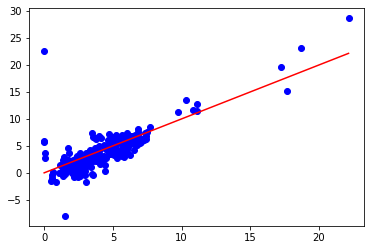

In [ ]:
plt.figsize=((10,10))
plt.scatter(Y_test, ytest_pred, color = 'blue')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color = 'red')
plt.show()

# Ridge Regression

In [ ]:
#Regularization Techniques
#Ridge Regression
from sklearn.linear_model import Ridge

#alpha: balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients
ridgereg = Ridge(alpha=1.0) #optimal value       
ridgereg.fit(X,Y)
y_pred_Ridge = ridgereg.predict(X_test)

#Performance metrics
AC_ridge = r2_score(Y_test, y_pred_Ridge)
print("Test score accuracy: ")
print (AC_ridge)

print ("mean_absolute_error :",metrics.mean_absolute_error(Y_test, y_pred_Ridge))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(Y_test, y_pred_Ridge))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred_Ridge)))

Test score accuracy: 
0.41928324662238114
mean_absolute_error : 1.2297321654266946


mean_squared_error :  4.472031114169739


root_mean_squared_error :  2.1147177386520735


Visualizing the Ridge Regression results

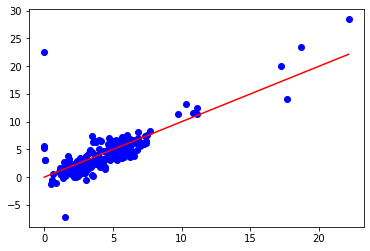

In [ ]:
plt.figsize=((10,10))
plt.scatter(Y_test, y_pred_Ridge, color = 'blue')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color = 'red')
plt.show()

# Lasso Regression

In [ ]:
#Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=1.0)
lassoreg.fit(X,Y)
y_pred_Lasso = lassoreg.predict(X_test)

#Performance metrics
AC_lasso = r2_score(Y_test, y_pred_Lasso)
print("Test score accuracy: ")
print (AC_lasso)

print ("mean_absolute_error :",metrics.mean_absolute_error(Y_test, y_pred_Lasso))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(Y_test, y_pred_Lasso))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred_Lasso)))

Test score accuracy: 
0.6389208626906607
mean_absolute_error : 0.7739365567818408


mean_squared_error :  2.780627779951296


root_mean_squared_error :  1.6675214481233205


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.950e+03, tolerance: 6.638e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Visualizing the Lasso Regression results

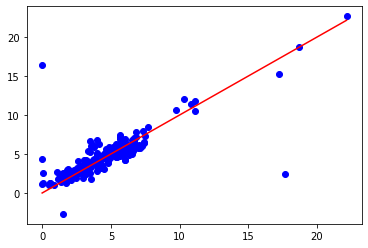

In [ ]:
plt.figsize=((10,10))
plt.scatter(Y_test, y_pred_Lasso, color = 'blue')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color = 'red')
plt.show()